In [1]:
#Importing necessary liabraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
data_price = pd.read_excel('/content/Medibuddy Insurance Data Price.xlsx')

In [3]:
data_price.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [4]:
data_personal_details = pd.read_excel('/content/Medibuddy insurance data personal details.xlsx')

In [5]:
data_personal_details.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [6]:
#merge two dataset
# check is there any null values in given dataset
data_price.isnull().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0


In [7]:
#do not have any null values present in data_price dataset
# check second dataset
data_personal_details.isnull().sum()

,0
Policy no.,0
children,0
smoker,0
region,0


In [8]:
#data_personal_details dataset also do not have any null values
# merge above two dataset as single dataset 'mainData'

In [9]:
mainData = pd.merge(data_price,data_personal_details, on = 'Policy no.', how = 'outer')

In [10]:
mainData.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


In [11]:
#check is there null record in mainData
mainData.isnull().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0
children,0
smoker,0
region,0


In [12]:
#do not have any null record in mainData

In [13]:
mainData.describe()

,age,bmi,charges in INR,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


###1. Does the gender of the person matter for the company as a constraint for extending policies?

In [14]:
mainData.value_counts('sex')

,count
sex,
male,676
female,662


In [15]:
mainData.groupby('sex')['charges in INR'].mean()

,charges in INR
sex,
female,12569.578844
male,13956.751178


<Axes: xlabel='sex', ylabel='charges in INR'>

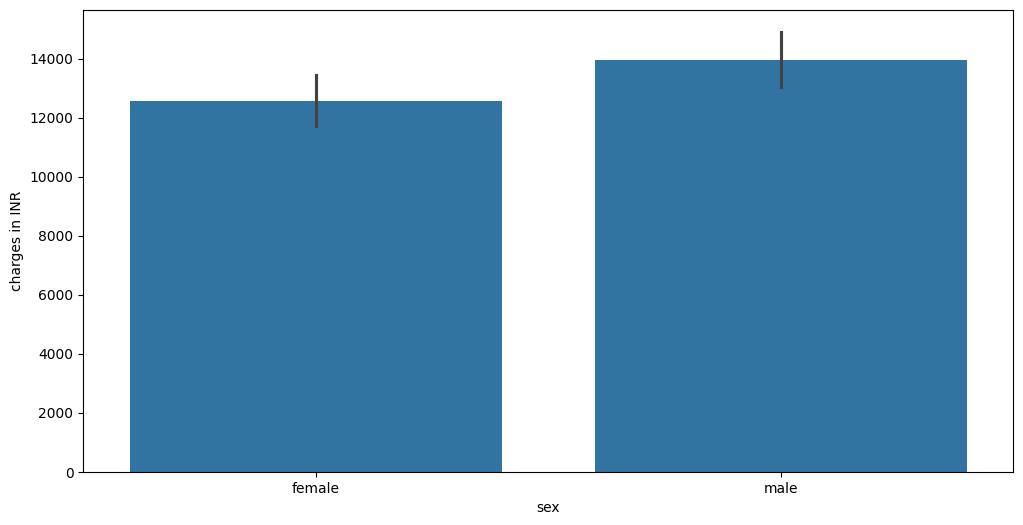

In [16]:
# Male are spending more amount or charges in INR campare to female on policies
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='sex',y='charges in INR', data=mainData)

Observations:
- The gender is a not a constraint for the compnay to give policy or not since neraly equal number of policies have been handed out to the both the genders
- However, the slight differnce can be seen interms of cost incurred calculating the mean cost of both the sex
- female	 12569.578844
-  male	   13956.751178
- making the medical policy for men 11.03% more expensive than women


###2. What is the average amount of money the company spent over each policy cover?

In [17]:
mainData['charges in INR'].mean()

13270.422265141257

- Average amount of money the company spent over each policy cover is 13270.422265141257

###3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

In [18]:
mainData.groupby('region')['charges in INR'].mean()

,charges in INR
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [19]:
mainData.groupby('region')['charges in INR'].median()

,charges in INR
region,
northeast,10057.652025
northwest,8965.795750
southeast,9294.131950
southwest,8798.593000


In [23]:
mainData.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Observations
- The above data conclude that the most policies are bought from 'southeast' region but even then the differnce is not considarably huge

###4. Does the no. of dependents make a difference in the amount claimed?

In [44]:
mainData.groupby('children')['charges in INR'].mean()

,charges in INR
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


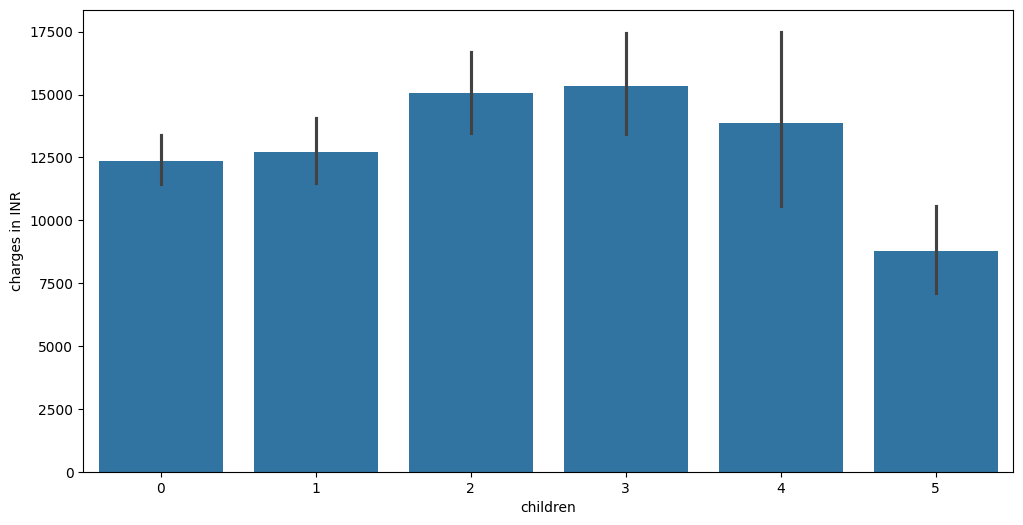

In [33]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='children',y='charges in INR', data = mainData)
plt.show()

Observation
- Data does not tell us the amount claimed by indivisuals. though we can infera subtile increase in the 'charges in INR' with the increasing childern but that starts fall after number of childern cross 3.
- Thus the info is ot sufficent for us to make decision about calculations of the claim.

###5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

In [46]:
mainData.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


<Axes: xlabel='bmi', ylabel='charges in INR'>

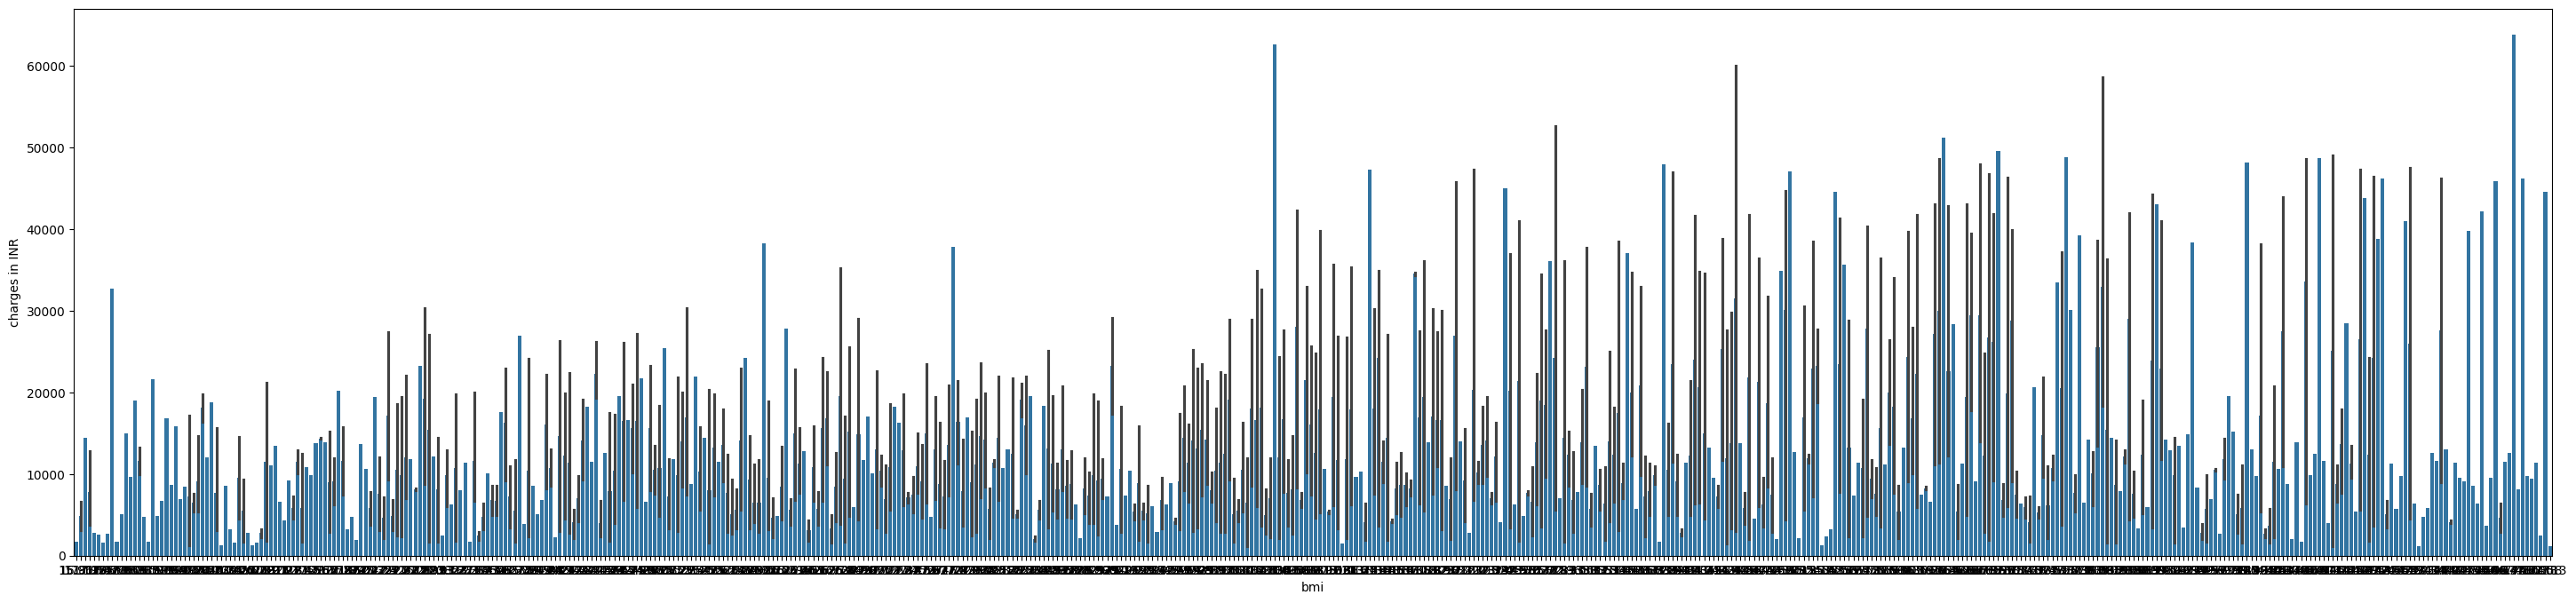

In [61]:
matplotlib.rcParams['figure.figsize']=(36,8)
sns.barplot(x='bmi',y='charges in INR', data=mainData)

<Axes: xlabel='bmi', ylabel='charges in INR'>

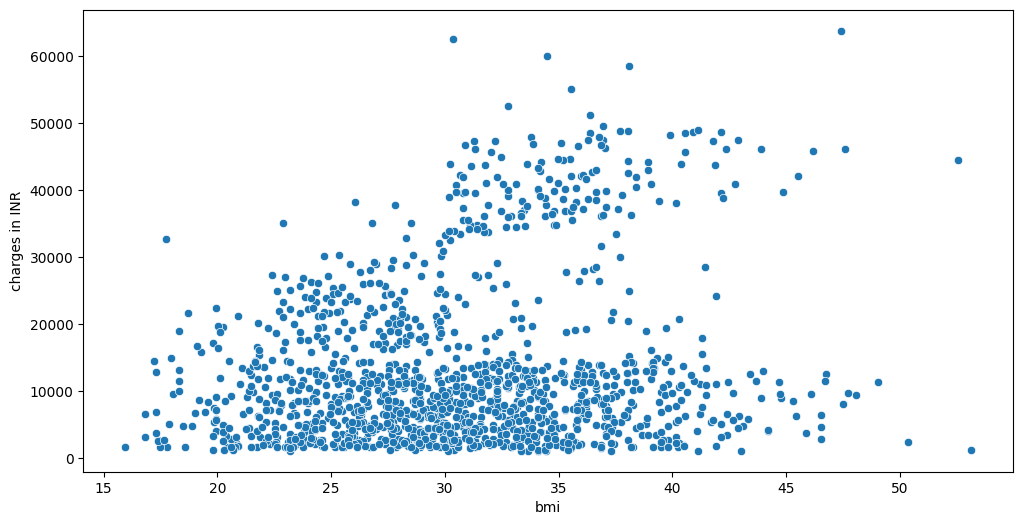

In [54]:
sns.scatterplot(x='bmi',y='charges in INR', data=mainData)

Observations:
- Though we cant conclude a rigid, liner trends but on larger scale, it seems that the cost incurred increses with 'bmi' this happed with exception of few dips probably where 'bmi' fails in the category - Healthy weight.
- Unhealthy person will be having high charges in INR.

###6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

In [68]:
mainData.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [69]:
mainData.groupby('smoker')['charges in INR'].mean()

,charges in INR
smoker,
no,8434.268298
yes,32050.231832


<Axes: xlabel='smoker', ylabel='charges in INR'>

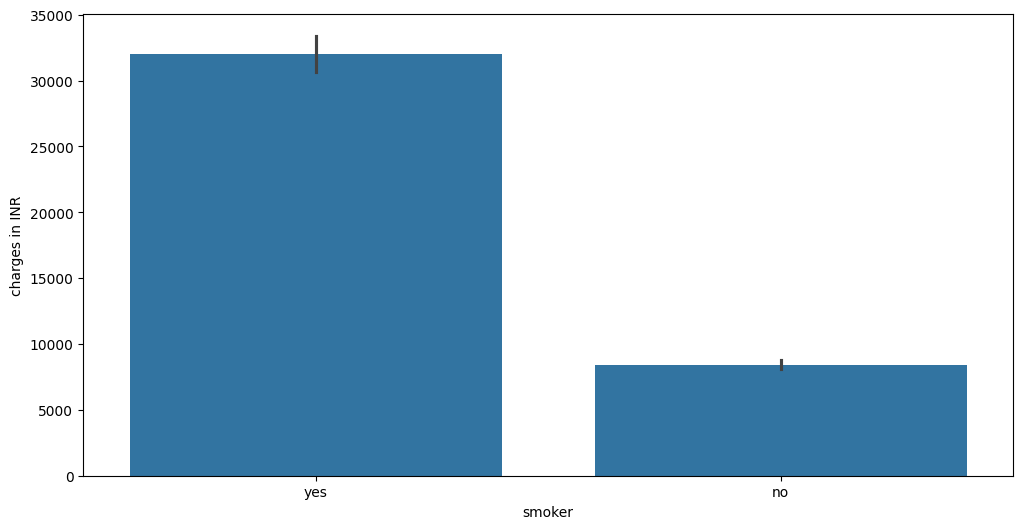

In [71]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='smoker',y='charges in INR', data=mainData)

In [79]:
100-((32050.231832- 8434.268298)/32050.231832)*100

26.315779374734348

Observations:
- Only 20.3% users are smokers in the givan data
- Most of the people who bought policy are no smokers.
- Average smoker pay -> 32050.231832
- Average non smoker pay -> 8434.268298
- This means the non-smokers on an average only has to to pay 26.31% of 'smoker' pays more for the same policy.